<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/Examen" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/yessss28/Estadistica/refs/heads/main/data.csv')
df


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


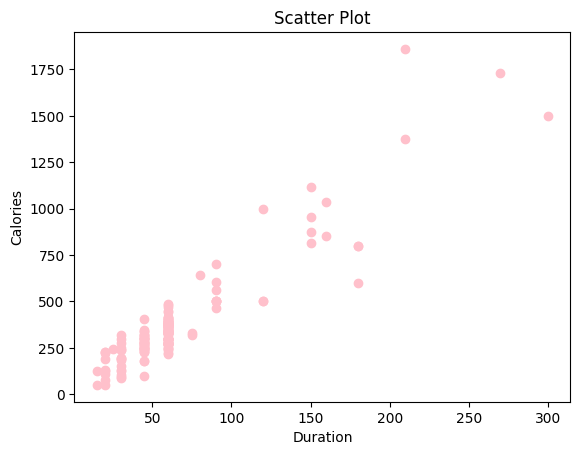

Coeficiente de correlación: 0.9227/n
Coeficiente de determinación:  0.8514/n
Intervalo de confianza de 98.0% para la pendiente:
-0.8839
             df        sum_sq       mean_sq           F        PR(>F)
X           1.0  9.847530e+06  9.847530e+06  928.219489  5.795220e-69
Residual  162.0  1.718667e+06  1.060905e+04         NaN           NaN


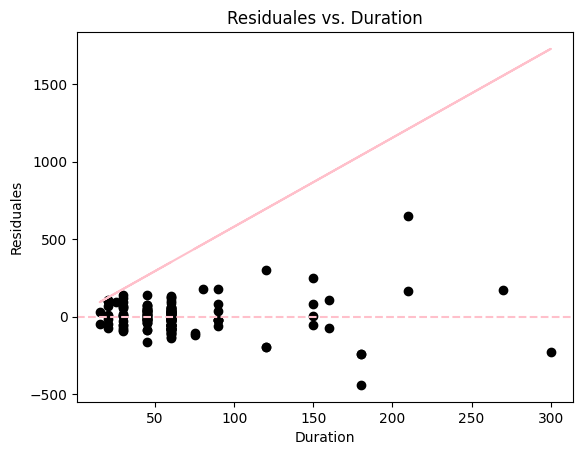

Valor p de Shapiro-Wilk:  0.0000
Valor p de Breusch-Pagan:  0.0000


In [ ]:

# a) Establezca una variable dependiente (Y) y una variable dependiente (X).

import pandas as pd
df = pd.read_csv ('https://raw.githubusercontent.com/yessss28/Estadistica/refs/heads/main/data.csv')
# eliminar registros cpn valores faltantes
df.dropna(inplace=True)

X = df['Duration'] # variable independiente
Y = df['Calories'] # variable dependiente

# b) Realiza un gráfico de dispersión y la recta de regresión ajustada.
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = 'pink')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot')
plt.show()
# recta de regreción lineal.
import statsmodels.api as sm
X_constant = sm.add_constant(X)
model = sm.OLS(Y, X_constant). fit()

b0, b1 = model.params
Fun = lambda x: b0 + b1 * x

Yc = Fun(X)

plt.plot(X, Yc, color = 'pink')

# C) Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.

from scipy.stats import pearsonr

r,_ = pearsonr (X, Y)
print(f'Coeficiente de correlación: {r:0.4f}/n')
print(f'Coeficiente de determinación: {r ** 2: 0.4f}/n')
# d) Obtén un intervalo de confianza de 98% para la pendiente e interpreta el resultado. Respalda tu conclusión usando ANOVA.

nivel_de_confianza = 0.98
intervalo_de_confianza = model.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza de {nivel_de_confianza * 100}% para la pendiente:')
print(f'{intervalo_de_confianza_b1 [0] - intervalo_de_confianza_b1[1]: 0.4f}')

# Tabla ANOVA
from statsmodels.formula.api import ols
# Y - X
model = ols('Y ~ X', data = df).fit()
tabla_anova = sm.stats.anova_lm(model)
print(tabla_anova)

# e) Verifica los supuestos.
resudiales = model.resid
plt.scatter(X, resudiales, color = 'black')
plt.xlabel('Duration')
plt.ylabel('Residuales')
plt.title('Residuales vs. Duration')
ax = plt.gca()
ax.axhline(y = 0, color = 'pink', linestyle = '--')
plt.show()

from scipy.stats import shapiro
_, valor_p_shapiro = shapiro(resudiales)
print(f'Valor p de Shapiro-Wilk: {valor_p_shapiro: 0.4f}')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_breuschpagan, _, _ = het_breuschpagan(resudiales, X_constant)
print(f'Valor p de Breusch-Pagan: {valor_p_breuschpagan: 0.4f}')
















